# KNN Regression
Unit 3 / Lesson 1 / Project 3

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with $k$ and weighting to see if you can do any better than we've done so far?

In [4]:
from sklearn import neighbors

# build our new model
# we'll use the loudness and duration features
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'duration']]
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

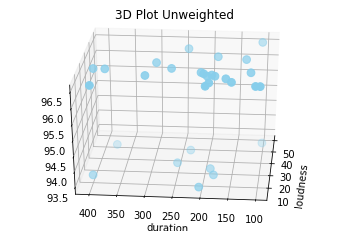

In [5]:
# Set up our prediction line
T = np.arange(0, 60, 1)[:, np.newaxis].reshape(-1,2)

# trailing underscores are a common convention for a prediction
Y_ = knn.predict(T)

# 3d plot w/ X, Y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(music['loudness'], music['duration'], Y_, c='skyblue', s=60)
ax.view_init(30, 185)

plt.ylabel('duration')
plt.xlabel('loudness')
plt.title('3D Plot Unweighted')
plt.show()

In [6]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music[['loudness', 'duration']]
Y = music.bpm
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='distance')

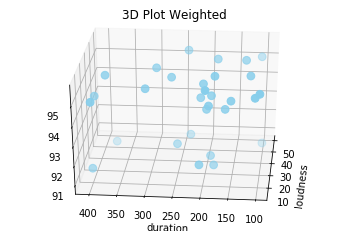

In [7]:
# Set up our prediction line
T = np.arange(0, 60, 1)[:, np.newaxis].reshape(-1,2)

# trailing underscores are a common convention for a prediction
Y_ = knn_w.predict(T)

# 3d plot w/ X, Y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(music['loudness'], music['duration'], Y_, c='skyblue', s=60)
ax.view_init(30, 185)

plt.ylabel('duration')
plt.xlabel('loudness')
plt.title('3D Plot Weighted')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted accuracy: -0.42 (+/- 0.78)
Weighted Accuracy: -0.26 (+/- 0.74)


It looks like niether of our models are very good.
This is likely because of the poor data set.

Something to make note of though, with the additional feature, the variance is more consistent across the weighted and unweighted models.